## Examples using Lowess

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from Lowess import Lowess

# Evaluaing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

# Data visualization
import matplotlib.pyplot as plt

In [2]:
seed = 441

### Applying LOWESS on Data with 1 Feature

In [3]:
# Simulate data
def true_model(X):
    return 4*np.sin(X) + 5

sample_size = 1000
np.random.seed(seed)

noise = np.random.normal(size=sample_size)
X = np.random.uniform(-15, 15, sample_size)
y = true_model(X) + noise

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Lowess()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Mean squared error of LOWESS predictions:", mse(ytest, y_pred))

Mean squared error of LOWESS predictions: 1.2690233072961266


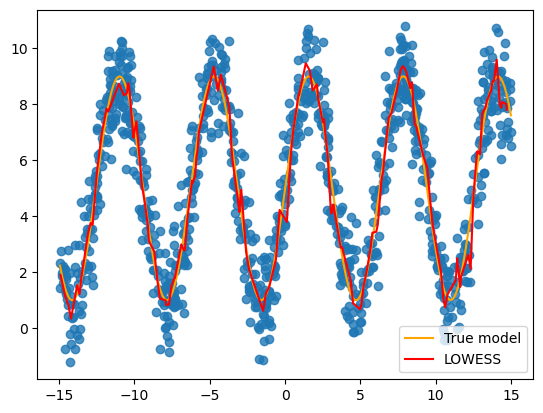

In [5]:
plt.scatter(X, y, alpha=0.8)

sort_idx = X.argsort()
plt.plot(X[sort_idx], true_model(X)[sort_idx], color='orange', label='True model')

sort_idx = Xtest.argsort()
plt.plot(Xtest[sort_idx], y_pred[sort_idx], color='red', label='LOWESS')

plt.legend()
plt.show()

In [6]:
# Predict using a single observation
observation = np.mean(X)
y_pred = model.predict(observation)

print('Feature value:', observation)
print('True value:', true_model(observation))
print('Prediction:', y_pred)

Feature value: -0.12816558776884757
True value: 4.488740030958991
Prediction: 17.842216611353926


### Applying LOWESS on Data with 3 Features

Get dataset here: https://gist.github.com/noamross/e5d3e859aa0c794be10b

In [7]:
# Import data
data = pd.read_csv('cars.csv')

X = data.loc[:,'CYL':'WGT'].values
y = data['MPG'].values

In [8]:
(X.shape, y.shape)

((392, 3), (392,))

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=seed)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

model = Lowess()
model.fit(Xtrain_scaled, ytrain)

y_pred = model.predict(Xtest_scaled)
print("Mean squared error of LOWESS predictions:", mse(ytest, y_pred))

Mean squared error of LOWESS predictions: 60.55484577157474


In [10]:
# Predict using a single observation
model = Lowess(tau=500)
model.fit(Xtrain_scaled, ytrain)

observation = np.array([np.mean(Xtrain_scaled, axis=0)])
y_pred = model.predict(observation)
print('Feature values:', observation)
print('Prediction:', y_pred)

Feature values: [[-1.81963071e-16 -1.34787460e-17  2.14595824e-16]]
Prediction: [9.25710348]
